#逻辑回归与最大似然

逻辑(Logistic)回归解决的是分类问题(应变量为离散型变量，自变量即可以是连续型，也可以是离散型)，最大似然是一种通用的解决概率问题的思想，两者之间的关系是线性回归和最小二乘法的关系。逻辑回归得到的是一个分割面，可以把数据一分为二

#1. 基本概念

0-1事件就是一个事件发生的概率只有两种可能，那么如果我们假设1发生的概率为p，那么0发生的概率就是1-p，用一个统一个公式来表示，就是$P\{X=x\}=p^x(1-p)^{1-x}$,定义事件1发生的几率为$odds=\frac{p}{1-p}$,对数几率z=ln(odds),那么可以推到出如下公式：$P\{X=x\}=\frac{1}{1+e^{-z}}$

伯努利分布是指数族分布，对于伯努利分布$Bernouli(\varphi)$,其中$y \in \{0, 1\}$，$\therefore$Bernouli分布函数可以写成如下形式

$P\{X=x\}=p^y(1-p)^{1-y}=e^{ln(p^y(1-p)^{1-y})}=e^{lnp^y+ln(1-p)^{1-y}}=e^{ylnp+(1-y)ln(1-p)}$

$=e^{ylnp+ln(1-p)-yln(1-p)}=e^{y[lnp-ln(1-p)]+ln(1-p)}=e^{yln\frac{p}{1-p}+ln(1-p)}$，推到这里，可以看到伯努利分布是指数族的分布

令$\varphi = ln\frac{p}{1-p}$，有$e^{\varphi}=\frac{p}{1-p}, \therefore p=\frac{e^{\varphi}}{1+e^{\varphi}}$，$\therefore p=\frac{1}{1+e^{-\varphi}}$，这里我们推出了Sigmoid函数.这是因为Logistic模型对问题的前置概率估计其实就是伯努利分布。

#2. 逻辑回归曲线

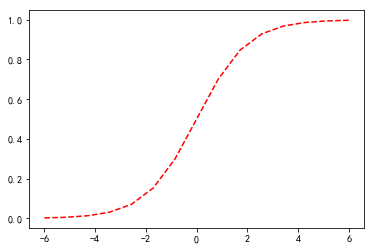

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import math

lineX = np.linspace(-6,6, 15)
y=1/(1+np.e**(-lineX))

plt.figure(1, facecolor='white')
plt.plot(lineX, y, 'r--')
plt.show()

#3 似然函数与损失函数

##3.1 Logistic公式
$h_{\theta}(x)=g(\theta^Tx)=\frac{1}{1+e^{-\theta^Tx}}$

$g'(x)=(\frac{1}{1+e^{-x}})'=\frac{e^{-x}}{(1+e^{-x})^2}=\frac{1}{1+e^{-x}} \bullet \frac{e^{-x}}{1+e^{-x}}$

$=\frac{1}{1+e^{-x}} \bullet (1-\frac{1}{1+e^{-x}})=g(x) \bullet (1-g(x))$

##3.2 似然函数
假定$\begin{cases}
P(y=1|x;\theta)=h_{\theta}(x)\\
P(y=0|x;\theta)=1-h_{\theta}(x)
\end{cases}$，那么就有$p(y|x;\theta)=(h_{\theta}(x))^y(1-h_{\theta}(x))^{1-y}$

那么似然函数$L(\theta)=p(\overrightarrow{y}|X;\theta)=\prod_{i=1}^m[h_{\theta}(x^{(i)})]^{y^{(i)}} \bullet [1-h_{\theta}(x^{(i)})]^{1-y^{(i)}}$

##3.3 对数似然函数
$\because L(\theta)==\prod_{i=1}^m[h_{\theta}(x^{(i)})]^{y^{(i)}} \bullet [1-h_{\theta}(x^{(i)})]^{1-y^{(i)}}$

$\Rightarrow \ell(\theta)=logL(\theta)=\sum_{i=1}^my^{(i)}logh_{\theta}(x^{(i)})+(1-y^{(i)})log(1-h_{\theta}(x^{(i)}))$

##3.4 对数似然求偏导
$\frac{\partial{\ell(\theta)}}{\partial{\theta_j}}=\sum_{i=1}^m[y^{(i)} \bullet \frac{1}{h_{\theta}(x^{(i)})} \bullet \frac{\partial{h_{\theta}(x^{(i)})}}{\partial{\theta_j}} + (1-y^{(i)}) \bullet -\frac{1}{1-h_{\theta}(x^{(i)})} \bullet \frac{\partial{h_{\theta}(x^{(i)})}}{\partial{\theta_j}}]=\sum_{i=1}^m[\frac{y^{(i)}}{h_{\theta}(x^{(i)})}-\frac{1-y^{(i)}}{1-h_{\theta}(x^{(i)})}] \bullet \frac{\partial{h_{\theta}(x^{(i)})}}{\partial{\theta_j}}$

$\because h_{\theta}(x^{(i)})=g(\theta^Tx^{(i)}), \therefore \frac{\partial{\ell(\theta)}}{\partial{\theta_j}}=\sum_{i=1}^m[\frac{y^{(i)}}{g(\theta^Tx^{(i)})}-\frac{1-y^{(i)}}{1-g(\theta^Tx^{(i)})}] \bullet \frac{\partial{g(\theta^Tx^{(i)})}}{\partial{\theta_j}}$

$\because g'(z)=g(z) \bullet (1-g(z)), \therefore \frac{\partial{\ell(\theta)}}{\partial{\theta_j}}=\sum_{i=1}^m[\frac{y^{(i)}}{g(\theta^Tx^{(i)})}-\frac{1-y^{(i)}}{1-g(\theta^Tx^{(i)})}] \bullet g(\theta^Tx^{(i)}) \bullet [1-g(\theta^Tx^{(i)})] \bullet \frac{\partial{\theta^Tx^{(i)}}}{\partial{\theta_j}}$

$\Rightarrow \frac{\partial{\ell(\theta)}}{\partial{\theta_j}}=\sum_{i=1}^m[y^{(i)}(1-g(\theta^Tx^{(i)})) - (1-y^{(i)})g(\theta^Tx^{(i)})] \bullet x_j^{(i)}$

$\Rightarrow \frac{\partial{\ell(\theta)}}{\partial{\theta_j}}=\sum_{i=1}^m[y^{(i)} - g(\theta^Tx^{(i)})] \bullet x_j^{(i)}$

##3.5 参数学习
$\theta_j:=\theta_j+\alpha\sum_{i=1}^m(y^{(i)}-h_{\theta}(x^{(i)}))x_j^{(i)}$,有了这个，就可以进行参数学习了。


##3.6 总结
我们发现这个式子和线性回归的形式是完全一样的，如果我们定义$h_{\theta}(x)=\theta{X}$，那么就是线性回归，如果我们定义$h_{\theta}(x)=\frac{1}{1+e^{-\theta{x}}}$，那么就是logistic回归。

Logistic回归中，我们假定模型服从的是二项分布，利用最大似然估计进行推导的；线性回归我们假定模型服从高斯分布，利用最大似然估计推导的；正是因为二项分布和高斯分布都是指数族分布，所以它们才能得到一样的参数学习法则

其实Logistic回归是一个广义的线性模型，这是因为$logit(p)=log\frac{p}{1-p}=log\frac{h_{\theta}(x)}{1-h_{\theta}(x)}=log(\frac{\frac{1}{1+e^{-\theta^T{x}}}}{\frac{e^{-\theta^T{x}}}{1+e^{-\theta^T{x}}}})=loge^{-\theta^T{x}}=\theta^Tx$


#4 Softmax回归

利用Logistic回归来进行多分类，就是Softmax回归

##4.1 定义
设样本为一个m行的记录$X=\{\overrightarrow{x_1},\overrightarrow{x_2},...,\overrightarrow{x_n}\}$, 共有K的类别，那么存在这么K个$\Theta$向量$\overrightarrow{\theta_1},\overrightarrow{\theta_2},...,\overrightarrow{\theta_K}$。令$Z=\Theta^TX$，且设$\varphi=\frac{1}{1+e^{-Z}}$，则有$\varphi=\frac{1}{1+e^{-\Theta^TX}}$

如果K=2，那么就是Logistic回归。分类为$y \in \{0, 1\}$，带入$\varphi$函数后，总能求的一个0~1之间的值，我们用0.5做分界点，大于0.5的就是分类1，否则就是分类0

如果K>2，那么可以令$C_i=e^{\overrightarrow{\theta_i}^T\overrightarrow{x_i}}$，则第i行的概率为$p(c=k|x;\theta)=\frac{e^{\theta_k^Tx}}{\sum_{i=1}^Ke^{\theta_i^Tx}}, k=1,2,...,K$

似然函数为$L(\theta)=\prod_{i=1}^m\prod_{k=1}^Kp(c=k|x^{(i)};\theta)^{y_k^{(i)}}=\prod_{i=1}^m\prod_{k=1}^K[\frac{e^{\theta_k^Tx}}{\sum_{i=1}^Ke^{\theta_i^Tx}}]^{y_k^{(i)}}$

对数似然：$J_m(\theta)=lnL(\theta)=\sum_{i=1}^m\sum_{k=1}^Ky_k^{(i)} \bullet (\theta_k^Tx^{(i)}-ln\sum_{i=1}^Ke^(\theta_i^Tx^{(i)}))$

$J(\theta)=\sum_{k=1}^Ky_k \bullet (\theta_k^Tx-ln\sum_{i=1}^Ke^{\theta_i^Tx})$

随机梯度：$\frac{\partial{J(\theta)}}{\partial{\theta_k}}=(y_k-p(y_k|x;\theta)) \bullet x$